<a href="https://colab.research.google.com/github/Gdssingh/Projects/blob/master/RiedVapourPressureRegressionAnalysis6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_excel(r'RVP_1.xlsx')
df.head()


,Unnamed: 0,time,Density,USN,USN1,P,Reflux,T1,T2,T3,T4,SN,LPG,offLPG,P2,P3,rvp
0,0,2018-02-18 06:00:00,836.426,62.5321,3060.54,9.59199,26.2975,66.4510,77.0198,149.757,169.294,246.3138,246.3138,0.0,9.58598,9.88965,4.8
1,1,2018-02-19 06:00:00,829.074,63.6465,3175.34,9.52229,26.6015,68.3035,78.0568,150.286,169.992,248.0488,248.0488,0.0,9.53498,9.84057,5.6
2,2,2018-02-20 06:00:00,837.822,61.3701,2863.19,9.49725,29.7641,70.6385,79.5374,154.672,169.875,249.4124,249.4124,0.0,9.50177,9.83583,4.6
3,3,2018-02-21 06:00:00,852.022,60.7040,2789.02,9.49463,24.8021,68.2304,79.9872,150.874,169.488,249.4752,249.4752,0.0,9.48515,9.77867,5.1
4,4,2018-02-22 06:00:00,835.839,63.6630,3268.07,9.50090,25.6546,67.4711,80.0072,149.199,169.249,249.2562,249.2562,0.0,9.42657,9.79957,5.2


In [6]:
X=df.drop(columns=['Unnamed: 0', 'time','rvp' ])
y=df.rvp

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=7)


In [29]:
X_train.head()

,Density,USN,USN1,P,Reflux,T1,T2,T3,T4,SN,LPG,offLPG,P2,P3
768,831.603,57.3587,1954.07,9.19698,20.7581,67.0071,76.5656,151.501,172.856,249.4216,249.4216,0.0,9.14794,9.40613
435,836.825,56.9874,2229.75,9.10105,24.5465,68.7747,78.4612,150.371,166.609,245.0702,245.0702,0.0,7.62188,9.34980
741,837.061,56.7765,1672.93,9.36458,19.4320,66.8520,78.7611,149.632,165.513,244.2741,244.2741,0.0,9.31458,9.57152
261,846.468,57.3792,2405.19,9.50059,25.4872,68.3321,77.4032,149.848,166.209,243.6122,243.6122,0.0,9.41657,9.77314
651,824.648,65.0398,3714.47,9.17037,25.5436,66.0069,78.1287,147.414,166.446,244.5747,244.5747,0.0,9.14412,9.43122


In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)
#qt(regressor_dt)

CV:  -0.4760199154029703
R2_score (train):  1.0
R2_score (test):  -0.6587446052327193
RMSE:  1.080182795546602


<function matplotlib.pyplot.show>

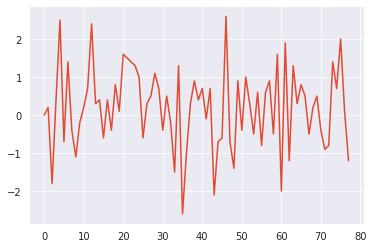

In [32]:
plt.plot(range(len(y_test)),y_pred_dt_test-y_test)
plt.show

In [41]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)
plt.plot(range(len(y_test)),y_pred_rf_test-y_test)
plt.show()


CV:  0.25024957891299626
R2_score (train):  0.8987494815679079
R2_score (test):  0.4100986579721968
RMSE:  0.6559776633548656


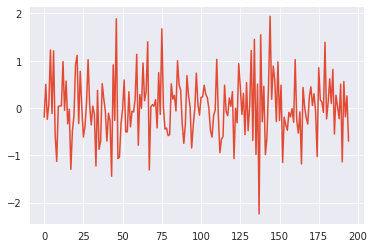

In [47]:
plt.plot(range(len(y_test)),y_pred_rf_test-y_test)
plt.show()


### EDA 

In [50]:
 list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('<M8[ns]')]

In [76]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,Density,USN,USN1,P,Reflux,T1,T2,T3,T4,SN,LPG,offLPG,P2,P3,rvp,SNyield,LPGyield,RefluxRatio,Z_Density
0,0,836.426,62.5321,3060.54,9.59199,26.2975,66.4510,77.0198,149.757,169.294,246.3138,246.3138,0.0,9.58598,9.88965,4.8,0.919519,0.080481,0.008592,0.681012
1,1,829.074,63.6465,3175.34,9.52229,26.6015,68.3035,78.0568,150.286,169.992,248.0488,248.0488,0.0,9.53498,9.84057,5.6,0.921883,0.078117,0.008378,0.202071
2,2,837.822,61.3701,2863.19,9.49725,29.7641,70.6385,79.5374,154.672,169.875,249.4124,249.4124,0.0,9.50177,9.83583,4.6,0.912890,0.087110,0.010395,0.771953
3,3,852.022,60.7040,2789.02,9.49463,24.8021,68.2304,79.9872,150.874,169.488,249.4752,249.4752,0.0,9.48515,9.77867,5.1,0.910551,0.089449,0.008893,1.697001
4,4,835.839,63.6630,3268.07,9.50090,25.6546,67.4711,80.0072,149.199,169.249,249.2562,249.2562,0.0,9.42657,9.79957,5.2,0.923730,0.076270,0.007850,0.642772


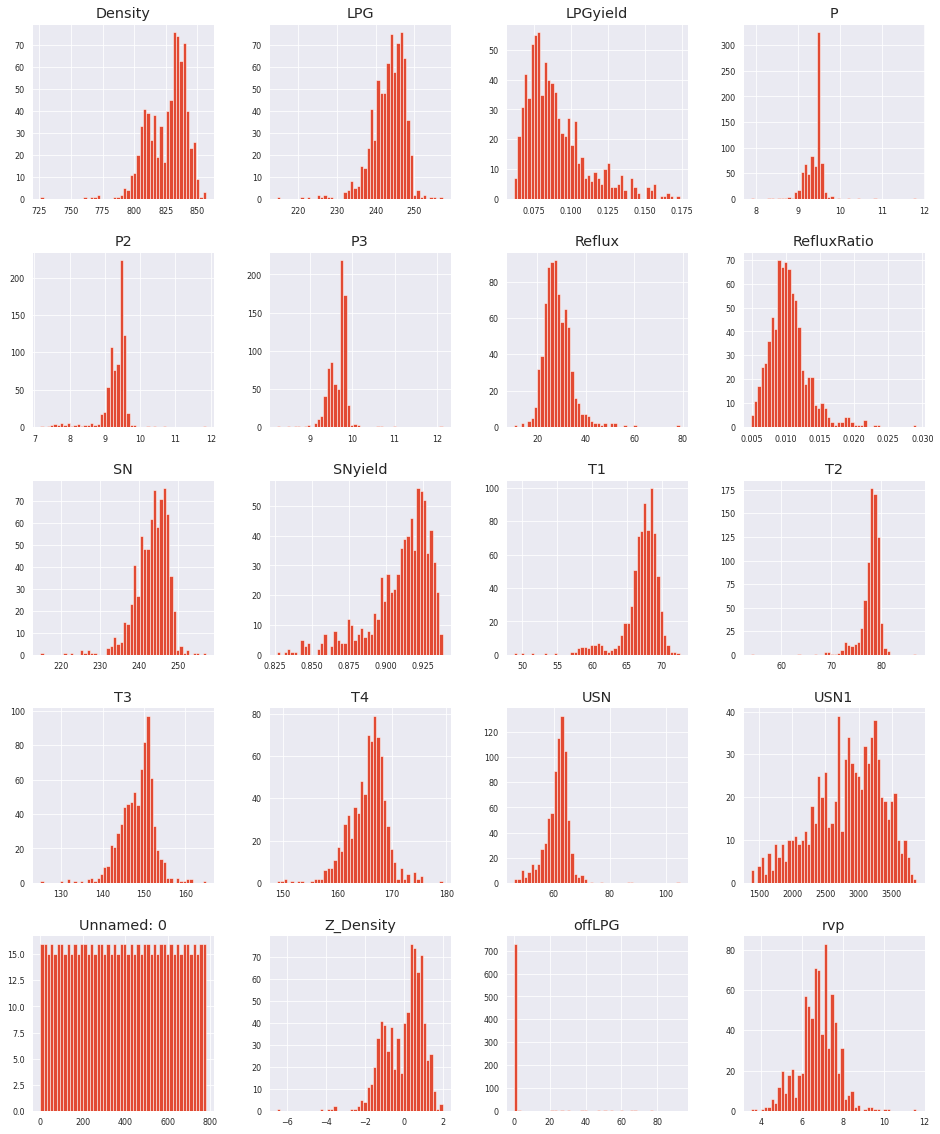

In [77]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [88]:
df_num_corr = df_num.corr()['rvp'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr.sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 19 strongly correlated values with SalePrice:
rvp            1.000000
Unnamed: 0     0.282657
USN            0.137422
Reflux         0.089198
SNyield        0.070654
USN1           0.068982
RefluxRatio    0.045697
offLPG         0.010060
P             -0.025262
P3            -0.029154
LPGyield      -0.070654
T1            -0.109753
P2            -0.115015
T2            -0.126002
Density       -0.239212
LPG           -0.451005
SN            -0.451005
T3            -0.455776
T4            -0.481040
Name: rvp, dtype: float64


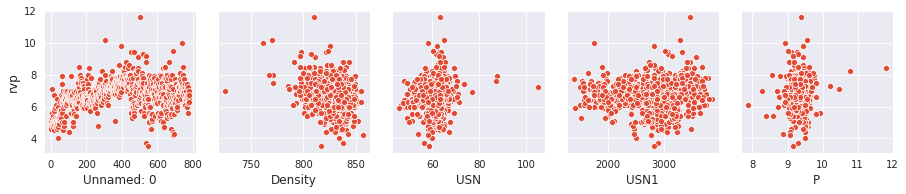

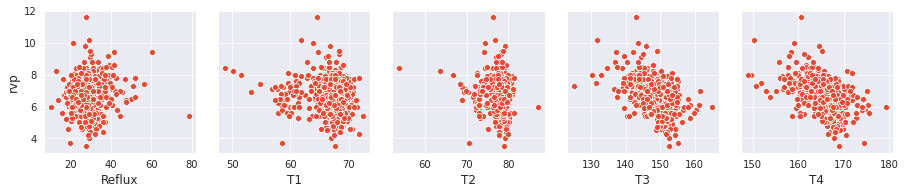

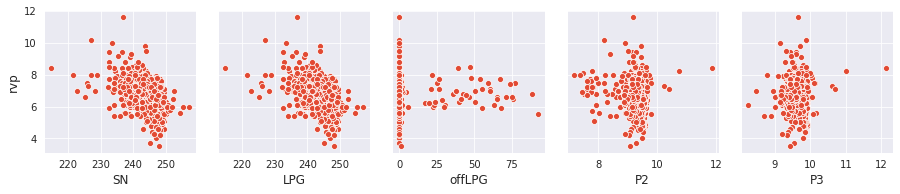

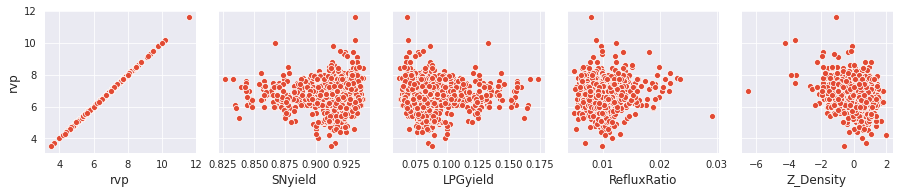

In [85]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['rvp'])

In [90]:
# import operator

# individual_features_df = []
# for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
#     tmpDf = df_num[[df_num.columns[i], 'rvp']]
#     tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
#     individual_features_df.append(tmpDf)

# all_correlations = {feature.columns[0]: feature.corr()['rvp'][0] for feature in individual_features_df}
# all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
# for (key, value) in all_correlations:
#     print(key, value)

In [58]:
df.columns

Index(['Unnamed: 0', 'time', 'Density', 'USN', 'USN1', 'P', 'Reflux', 'T1',
       'T2', 'T3', 'T4', 'SN', 'LPG', 'offLPG', 'P2', 'P3', 'rvp'],
      dtype='object')

In [64]:
df['LPGyield']=df['LPG']/df['USN1']

In [68]:
df['SNyield']=1-df['LPGyield']

In [69]:
df['RefluxRatio']=df['Reflux']/df['USN1']

In [79]:
df['Z_Density']=(df['Density']-np.mean(df.Density))/np.std(df.Density)

In [80]:
df.head()

,Unnamed: 0,time,Density,USN,USN1,P,Reflux,T1,T2,T3,T4,SN,LPG,offLPG,P2,P3,rvp,SNyield,LPGyield,RefluxRatio,Z_Density
0,0,2018-02-18 06:00:00,836.426,62.5321,3060.54,9.59199,26.2975,66.4510,77.0198,149.757,169.294,246.3138,246.3138,0.0,9.58598,9.88965,4.8,0.919519,0.080481,0.008592,0.681012
1,1,2018-02-19 06:00:00,829.074,63.6465,3175.34,9.52229,26.6015,68.3035,78.0568,150.286,169.992,248.0488,248.0488,0.0,9.53498,9.84057,5.6,0.921883,0.078117,0.008378,0.202071
2,2,2018-02-20 06:00:00,837.822,61.3701,2863.19,9.49725,29.7641,70.6385,79.5374,154.672,169.875,249.4124,249.4124,0.0,9.50177,9.83583,4.6,0.912890,0.087110,0.010395,0.771953
3,3,2018-02-21 06:00:00,852.022,60.7040,2789.02,9.49463,24.8021,68.2304,79.9872,150.874,169.488,249.4752,249.4752,0.0,9.48515,9.77867,5.1,0.910551,0.089449,0.008893,1.697001
4,4,2018-02-22 06:00:00,835.839,63.6630,3268.07,9.50090,25.6546,67.4711,80.0072,149.199,169.249,249.2562,249.2562,0.0,9.42657,9.79957,5.2,0.923730,0.076270,0.007850,0.642772


In [89]:
df_num_corr = df_num.corr()['rvp'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr.sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 19 strongly correlated values with SalePrice:
rvp            1.000000
Unnamed: 0     0.282657
USN            0.137422
Reflux         0.089198
SNyield        0.070654
USN1           0.068982
RefluxRatio    0.045697
offLPG         0.010060
P             -0.025262
P3            -0.029154
LPGyield      -0.070654
T1            -0.109753
P2            -0.115015
T2            -0.126002
Density       -0.239212
LPG           -0.451005
SN            -0.451005
T3            -0.455776
T4            -0.481040
Name: rvp, dtype: float64


In [103]:
X1=df.drop(columns=['rvp','Unnamed: 0','RefluxRatio','offLPG','SNyield','USN1','P','P3','LPGyield','T1','P2','time'])
y1=df.rvp
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=.2,random_state=7)


In [104]:
X_train1.head()

,Density,USN,Reflux,T2,T3,T4,SN,LPG,Z_Density
769,831.181,53.1247,24.7608,78.5827,151.778,167.366,245.9487,245.9487,0.339330
316,824.643,62.9028,30.9590,78.5410,148.658,165.649,244.1900,244.1900,-0.086583
70,835.251,64.2100,32.9723,79.0659,150.272,167.374,246.4399,246.4399,0.604467
729,820.971,60.0855,35.7019,77.5484,145.265,159.228,236.7764,236.7764,-0.325792
698,844.169,59.1660,39.1490,78.4864,147.462,161.233,239.7194,239.7194,1.185424


In [105]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor_rf.fit(X_train1, y_train1.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [106]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train1, y = y_train1.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train1)
r2_score_rf_train = r2_score(y_train1, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test1)
r2_score_rf_test = r2_score(y_test1, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test1, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)


CV:  0.22013598050252234
R2_score (train):  0.8941221740782841
R2_score (test):  0.3198719990934077
RMSE:  0.7256161058996831


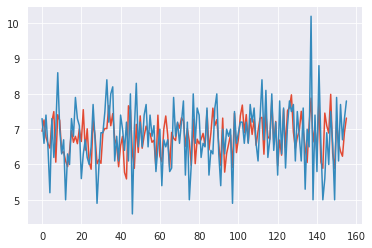

In [108]:
plt.plot(range(len(y_test1)),y_pred_rf_test)
plt.plot(range(len(y_test1)),y_test1)
plt.show()

In [116]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data


# Plot 
fig = px.line(y_test1, x=np.arange(len(y_test1)), y=y_test1)

# Only thing I figured is - I could do this 
fig.add_scatter(x=np.arange(len(y_test1)), y=y_pred_rf_test, mode='lines')

# Show plot 
fig.show()

In [136]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data


# Plot 
fig = px.line(y_train1, x=np.arange(len(y_train1)), y=y_train1)

# Only thing I figured is - I could do this 
fig.add_scatter(x=np.arange(len(y_train1)), y=y_pred_rf_train, mode='lines')

# Show plot 
fig.show()
y_train.shape

(585,)

###NN

In [121]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X1,y1,test_size=.1,random_state=7)

In [188]:
X_train.shape

(585, 14)

In [212]:
from keras import models
from keras import layers
from keras import regularizers
model=models.Sequential()
model.add(layers.Dense(256, activation='relu',input_shape=(X_train2.shape[1],)))
# model.add(layers.Dense(256,
#                         kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#                         bias_regularizer=regularizers.l2(1e-4),
#                         activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 32)               

In [213]:
from keras import optimizers
history=model.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['mae'])

In [214]:
history=model.fit(X_train2,y_train2,batch_size=8,epochs=1000,validation_split=0.1)

Train on 631 samples, validate on 71 samples
Epoch 1/1000
631/631 [==============================] - 1s 2ms/step - loss: 1.8146 - mae: 0.9696 - val_loss: 0.8325 - val_mae: 0.7190
Epoch 2/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.2207 - mae: 0.8505 - val_loss: 0.9086 - val_mae: 0.7571
Epoch 3/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.2117 - mae: 0.8598 - val_loss: 0.8858 - val_mae: 0.7013
Epoch 4/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.1584 - mae: 0.8295 - val_loss: 1.0995 - val_mae: 0.8616
Epoch 5/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.2246 - mae: 0.8445 - val_loss: 0.8308 - val_mae: 0.6777
Epoch 6/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.1013 - mae: 0.7917 - val_loss: 0.7838 - val_mae: 0.6962
Epoch 7/1000
631/631 [==============================] - 1s 1ms/step - loss: 1.1034 - mae: 0.8014 - val_loss: 0.8498 - val_mae: 0.7303
Epoch 8/1000
631/

In [209]:

n=model.predict(X_train2)[:,0].tolist()
m=model.predict(X_test2)[:,0].tolist()

###Train Data.  blue= actual, red= predicted

In [198]:
# import plotly.offline as pyo
# import plotly.graph_objs as go

# trace0=go.Scatter(
#     x=np.arange(len(y_train2)),
#     y=y_train2,
#     mode='lines',
#     name='actual data'
# )
# trace1=go.Scatter(
#     x=np.arange(len(y_train2)),
#     y=f,
#     mode='lines',
#     name='actual data'
# )
# data=[trace0,trace1]
# layout=go.Layout(title='RVP on train data')
# figure=go.Figure(data=data,layout=layout)
# pyo.plot(figure)

'temp-plot.html'

In [197]:
#f=np.array(model.predict(X_train1)).tolist()
#model.predict(X_train1)


In [210]:

import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data


# Plot 
fig = px.line(y_train2, x=np.arange(len(y_train2)), y=y_train2)

# Only thing I figured is - I could do this 
fig.add_scatter(x=np.arange(len(y_train2)), y=n, mode='lines')

# Show plot 
fig.show()

### Test data.  Blue=actual, red=predicted

In [211]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# Get some data


# Plot 
fig = px.line(y_test2, x=np.arange(len(y_test2)), y=y_test2)

# Only thing I figured is - I could do this 
fig.add_scatter(x=np.arange(len(y_test2)), y=m, mode='lines')

# Show plot 
fig.show()